Import new functions from `lof_calcs.py`.

In [29]:
from modules.lof_calcs import *

Import all samples, heterozygous or homozygous, convert to binary.

In [30]:
Control_2000_het = make_dataframe("data/Control_2000_het.tsv")
Treated_2000_het = make_dataframe("data/Treatment_2000_het.tsv")
Treated_1972_het = make_dataframe("data/Treatment_1972_het.tsv")

Control_2000_hom = make_dataframe("data/Control_2000_hom.tsv")
Treated_2000_hom = make_dataframe("data/Treatment_2000_hom.tsv")
Treated_1972_hom = make_dataframe("data/Treatment_1972_hom.tsv")

Calculate allele frequencies for each population.

In [59]:
Control_2000_het_pc = intra_pop_stat(Control_2000_het)
Treated_2000_het_pc = intra_pop_stat(Treated_2000_het)
Treated_1972_het_pc = intra_pop_stat(Treated_1972_het)

Control_2000_hom_pc = intra_pop_stat(Control_2000_hom)
Treated_2000_hom_pc = intra_pop_stat(Treated_2000_hom)
Treated_1972_hom_pc = intra_pop_stat(Treated_1972_hom)

Calculate product of differences in LOF mutation allele frequency between populations.

In [32]:
temp_time_het = inter_pop_stat(Treated_1972_het_pc, Treated_2000_het_pc)
loc_temp_het = inter_pop_stat(Control_2000_het_pc, Treated_2000_het_pc)
time_loc_het = inter_pop_stat(Treated_1972_het_pc, Control_2000_het_pc)

temp_time_hom = inter_pop_stat(Treated_1972_hom_pc, Treated_2000_hom_pc)
loc_temp_hom = inter_pop_stat(Control_2000_hom_pc, Treated_2000_hom_pc)
time_loc_hom = inter_pop_stat(Treated_1972_hom_pc, Control_2000_hom_pc)

Calculate product of differences in LOF mutation allele frequency between factors to isolate them.

In [33]:
temp_het = product_calc(temp_time_het, time_loc_het, loc_temp_het)
loc_het = product_calc(loc_temp_het, temp_time_het, time_loc_het)
time_het = product_calc(temp_time_het, loc_temp_het, time_loc_het)

temp_hom = product_calc(temp_time_hom, time_loc_hom, loc_temp_hom)
loc_hom = product_calc(loc_temp_hom, temp_time_hom, time_loc_hom)
time_hom = product_calc(temp_time_hom, loc_temp_hom, time_loc_hom)

Add some metadata.

In [34]:
temp_het = add_gff_metadata(temp_het, "Sm_ManualCuration.v1.1.2.gff")
loc_het = add_gff_metadata(loc_het, "Sm_ManualCuration.v1.1.2.gff")
time_het = add_gff_metadata(time_het, "Sm_ManualCuration.v1.1.2.gff")

temp_hom = add_gff_metadata(temp_hom, "Sm_ManualCuration.v1.1.2.gff")
loc_hom = add_gff_metadata(loc_hom, "Sm_ManualCuration.v1.1.2.gff")
time_hom = add_gff_metadata(time_hom, "Sm_ManualCuration.v1.1.2.gff")

Merge hetereozygous and homozygous dataframes together.

In [35]:
merged_temp = melt_merge_pops(temp_het, temp_hom)
merged_loc = melt_merge_pops(loc_het, loc_hom)
merged_time = melt_merge_pops(time_het, time_hom)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  This is separate from the ipykernel packag

### Allele frequencies for each factor per zygosity.

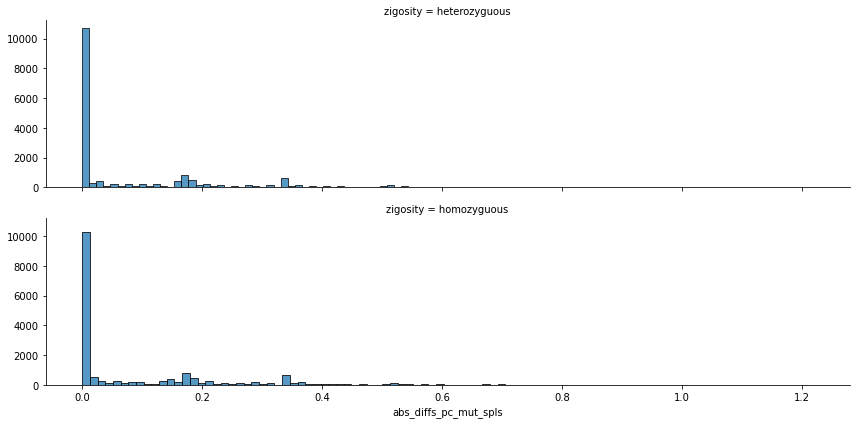

In [36]:
import seaborn as sns

g = sns.FacetGrid(merged_temp, row="zigosity", height=3, aspect=4)
g.map(sns.histplot, "abs_diffs_pc_mut_spls")

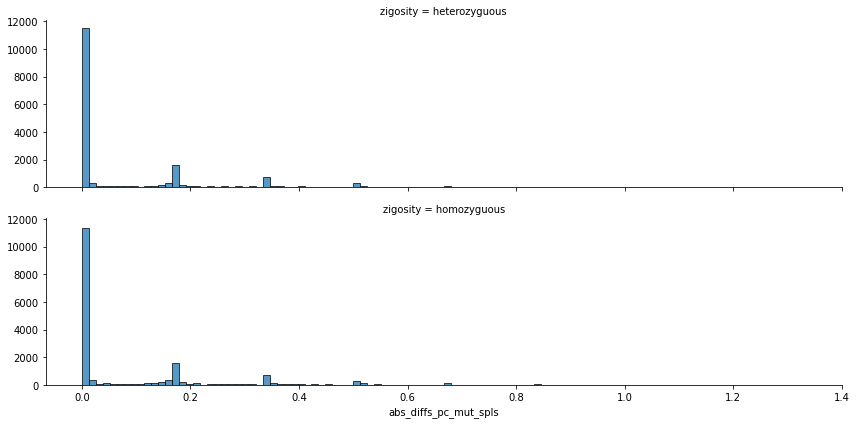

In [37]:
h = sns.FacetGrid(merged_loc, row="zigosity", height=3, aspect=4)
h.map(sns.histplot, "abs_diffs_pc_mut_spls")

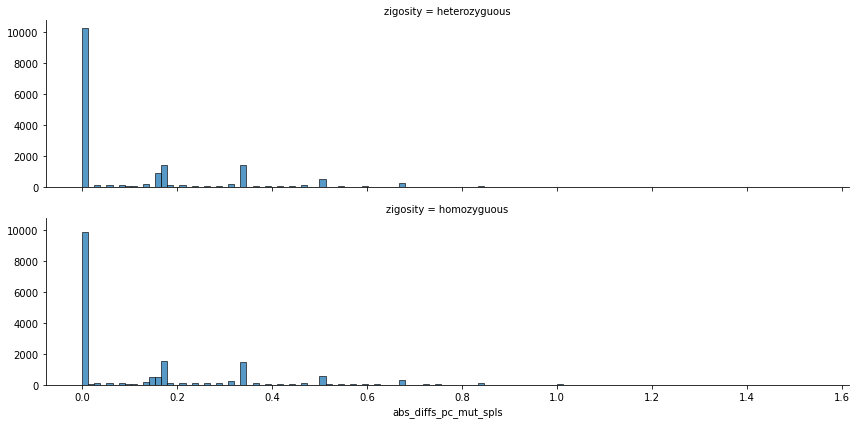

In [38]:
i = sns.FacetGrid(merged_time, row="zigosity", height=3, aspect=4)
i.map(sns.histplot, "abs_diffs_pc_mut_spls")

### Mean allele frequencies per chromosome per factor across zygosity.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Temperature')

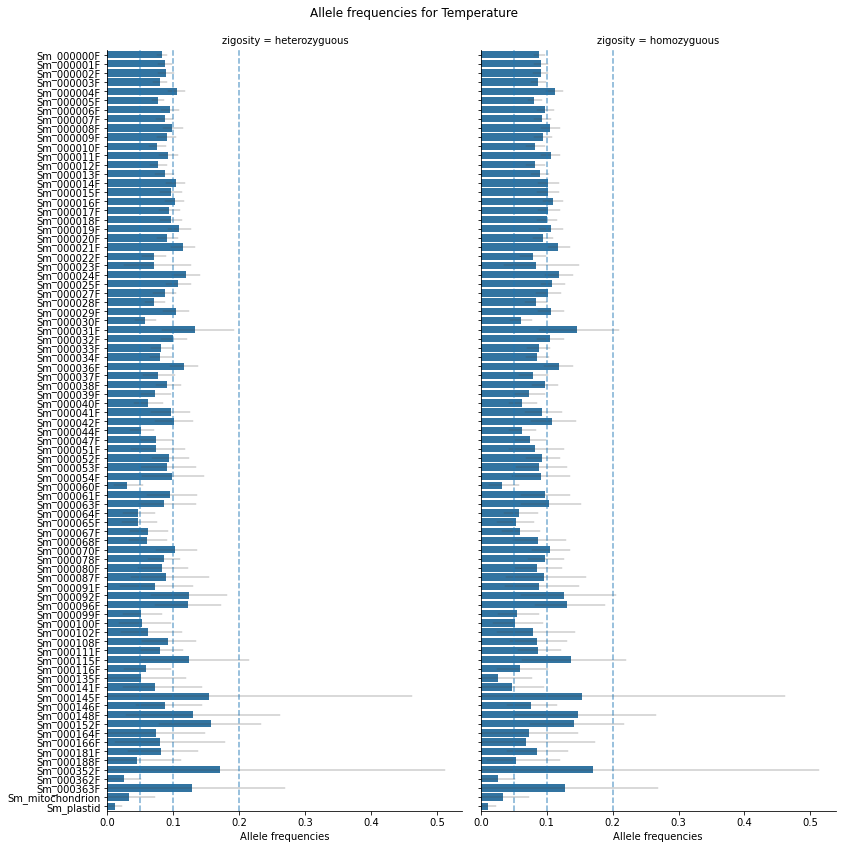

In [39]:
from numpy import mean
import matplotlib.pyplot as plt

j = sns.FacetGrid(merged_temp.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
j.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = j.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
j.fig.suptitle('Allele frequencies for Temperature')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Location')

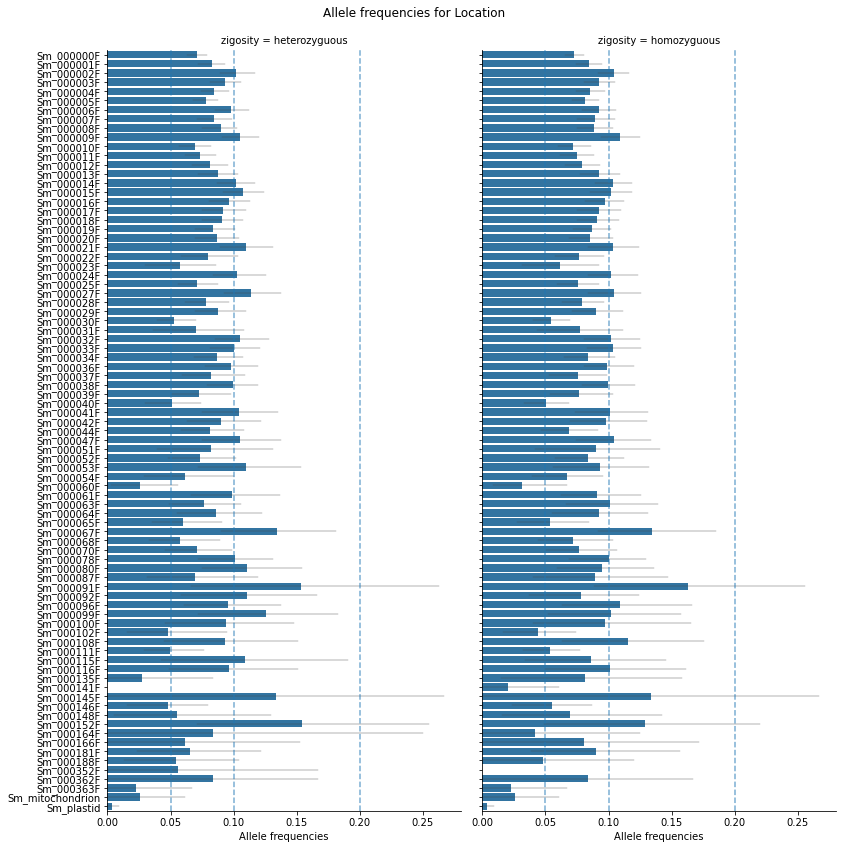

In [40]:
k = sns.FacetGrid(merged_loc.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
k.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = k.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
k.fig.suptitle('Allele frequencies for Location')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Time')

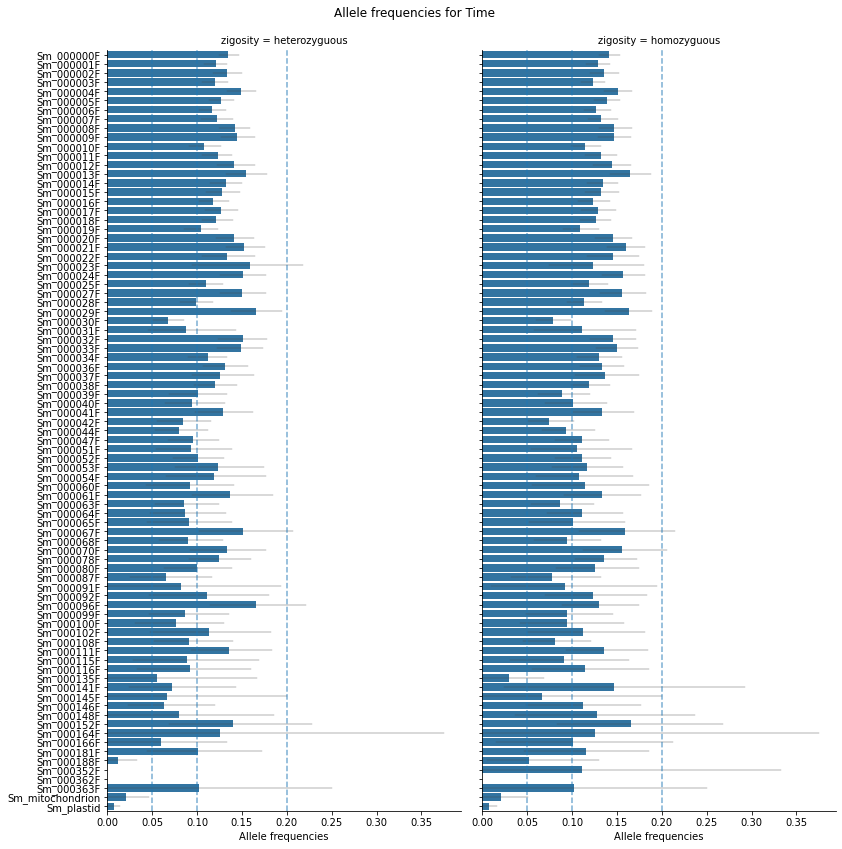

In [41]:
l = sns.FacetGrid(merged_time.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
l.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = l.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
l.fig.suptitle('Allele frequencies for Time')

### Genes with average allele frequencies larger than 0.2 for each factor

In [50]:
temp_het[temp_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00009006,1.205128,Sm_000015F,1052693,1054055,heterozyguous
Sm_g00007202,1.025641,Sm_000010F,1253463,1254836,heterozyguous
Sm_g00012323,1.025641,Sm_000030F,396159,397589,heterozyguous
Sm_g00008308,1.025641,Sm_000016F,199304,199861,heterozyguous
Sm_g00004964,1.025641,Sm_000006F,579151,580241,heterozyguous
...,...,...,...,...,...
Sm_g00004195,0.205128,Sm_000002F,251178,252665,heterozyguous
Sm_g00004222,0.205128,Sm_000002F,322999,323322,heterozyguous
Sm_g00013803,0.205128,Sm_000033F,37525,38958,heterozyguous
Sm_g00008816,0.205128,Sm_000015F,505543,507719,heterozyguous


In [53]:
temp_hom[temp_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00017640,1.217949e+00,Sm_000068F,88166,89506,homozyguous
Sm_g00009006,1.205128e+00,Sm_000015F,1052693,1054055,homozyguous
Sm_g00000046,1.051282e+00,Sm_000000F,258845,259348,homozyguous
Sm_g00007202,1.038462e+00,Sm_000010F,1253463,1254836,homozyguous
Sm_g00008308,1.025641e+00,Sm_000016F,199304,199861,homozyguous
...,...,...,...,...,...
Sm_g00004545,0.000000e+00,Sm_000002F,1138913,1140319,homozyguous
Sm_g00014849,0.000000e+00,Sm_000037F,603321,604217,homozyguous
Sm_g00006472,0.000000e+00,Sm_000009F,525171,527903,homozyguous
Sm_g00007017,-1.387779e-17,Sm_000010F,729713,731186,homozyguous


In [127]:
loc_het[loc_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00009942,1.333333,Sm_000013F,290612,291100,heterozyguous
Sm_g00009018,1.192308,Sm_000015F,1104148,1105514,heterozyguous
Sm_g00010385,1.192308,Sm_000017F,501974,503343,heterozyguous
Sm_g00012875,1.166667,Sm_000027F,487228,489757,heterozyguous
Sm_g00009441,1.076923,Sm_000018F,1025213,1027835,heterozyguous
...,...,...,...,...,...
Sm_g00009211,0.205128,Sm_000018F,403706,404902,heterozyguous
Sm_g00005429,0.205128,Sm_000007F,393390,395444,heterozyguous
Sm_g00008797,0.205128,Sm_000015F,462651,463783,heterozyguous
Sm_g00002782,0.205128,Sm_000003F,73708,74390,heterozyguous


In [128]:
loc_hom[loc_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00009942,1.333333,Sm_000013F,290612,291100,homozyguous
Sm_g00006653,1.217949,Sm_000009F,1004766,1006369,homozyguous
Sm_g00010385,1.192308,Sm_000017F,501974,503343,homozyguous
Sm_g00009018,1.179487,Sm_000015F,1104148,1105514,homozyguous
Sm_g00007652,1.038462,Sm_000008F,1082252,1086958,homozyguous
...,...,...,...,...,...
Sm_g00015703,0.205128,Sm_000040F,333092,334153,homozyguous
Sm_g00005578,0.205128,Sm_000007F,726530,727747,homozyguous
Sm_g00015694,0.205128,Sm_000040F,293649,296029,homozyguous
Sm_g00001654,0.205128,Sm_000001F,1014580,1015155,homozyguous


In [129]:
time_het[time_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00003633,1.538462,Sm_000004F,530906,533621,heterozyguous
Sm_g00003836,1.500000,Sm_000004F,1084801,1085607,heterozyguous
Sm_g00003992,1.384615,Sm_000004F,1538255,1540171,heterozyguous
Sm_g00004607,1.333333,Sm_000002F,1293419,1293880,heterozyguous
Sm_g00015610,1.333333,Sm_000040F,1027,1686,heterozyguous
...,...,...,...,...,...
Sm_g00005323,0.205128,Sm_000007F,143704,148010,heterozyguous
Sm_g00001634,0.205128,Sm_000001F,954848,958663,heterozyguous
Sm_g00009201,0.205128,Sm_000018F,371707,373623,heterozyguous
Sm_g00007418,0.205128,Sm_000008F,359003,360036,heterozyguous


In [130]:
time_hom[time_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity
Sm_g00003633,1.538462,Sm_000004F,530906,533621,homozyguous
Sm_g00003836,1.500000,Sm_000004F,1084801,1085607,homozyguous
Sm_g00005770,1.384615,Sm_000007F,1449672,1450748,homozyguous
Sm_g00003992,1.384615,Sm_000004F,1538255,1540171,homozyguous
Sm_g00015610,1.333333,Sm_000040F,1027,1686,homozyguous
...,...,...,...,...,...
Sm_g00001414,0.205128,Sm_000001F,390897,391325,homozyguous
Sm_g00009327,0.205128,Sm_000018F,703960,705747,homozyguous
Sm_g00004545,0.205128,Sm_000002F,1138913,1140319,homozyguous
Sm_g00002162,0.205128,Sm_000005F,279080,279475,homozyguous


`Sm_g00005770` is a BspA family leucine-rich repeat surface protein

### Genes that were mutated (heterozygous and homozygous) across all effects?

In [72]:
temp_het_LOF_genes = (temp_het[temp_het.abs_diffs_pc_mut_spls > 0]).index
time_het_LOF_genes = (time_het[time_het.abs_diffs_pc_mut_spls > 0]).index
loc_het_LOF_genes = (loc_het[loc_het.abs_diffs_pc_mut_spls > 0]).index

genes_all_effects_het = list(set(temp_het_LOF_genes) & set(time_het_LOF_genes) & set(loc_het_LOF_genes))

temp_het[temp_het.index.isin(genes_all_effects_het)].drop('abs_diffs_pc_mut_spls', axis=1)

,chromosome,start,end,zigosity
Sm_g00000023,Sm_000000F,136579,136796,heterozyguous
Sm_g00000050,Sm_000000F,268884,270545,heterozyguous
Sm_g00000077,Sm_000000F,375415,376850,heterozyguous
Sm_g00000536,Sm_000000F,1666024,1666665,heterozyguous
Sm_g00000538,Sm_000000F,1667801,1669837,heterozyguous
...,...,...,...,...
Sm_g00020208,Sm_000092F,136485,137168,heterozyguous
Sm_g00020271,Sm_000023F,70988,73341,heterozyguous
Sm_g00020299,Sm_000116F,76465,79899,heterozyguous
Sm_g00020525,Sm_000100F,87233,90028,heterozyguous


In [71]:
temp_hom_LOF_genes = (temp_hom[temp_hom.abs_diffs_pc_mut_spls > 0]).index
time_hom_LOF_genes = (time_hom[time_hom.abs_diffs_pc_mut_spls > 0]).index
loc_hom_LOF_genes = (loc_hom[loc_hom.abs_diffs_pc_mut_spls > 0]).index

genes_all_effects_hom = list(set(temp_hom_LOF_genes) & set(time_hom_LOF_genes) & set(loc_hom_LOF_genes))

temp_hom[temp_hom.index.isin(genes_all_effects_hom)].drop('abs_diffs_pc_mut_spls', axis=1)

,chromosome,start,end,zigosity
Sm_g00000050,Sm_000000F,268884,270545,homozyguous
Sm_g00000536,Sm_000000F,1666024,1666665,homozyguous
Sm_g00000709,Sm_000000F,2109934,2110482,homozyguous
Sm_g00001004,Sm_000000F,2822111,2823098,homozyguous
Sm_g00001074,Sm_000000F,3042228,3043331,homozyguous
...,...,...,...,...
Sm_g00018829,Sm_000053F,149300,149485,homozyguous
Sm_g00019211,Sm_000067F,176116,176322,homozyguous
Sm_g00020208,Sm_000092F,136485,137168,homozyguous
Sm_g00020525,Sm_000100F,87233,90028,homozyguous


`Sm_g00000709` is an Integrase core domain-containing protein

### Mutated genes in common for all factors AND regardless of zigosity?

In [86]:
genes_all_effects = list(set(genes_all_effects_hom) & set(genes_all_effects_het))
genes_all_effects_df = temp_hom[temp_hom.index.isin(genes_all_effects)].drop('abs_diffs_pc_mut_spls', axis=1)
temp_hom[temp_hom.index.isin(genes_all_effects)].drop('abs_diffs_pc_mut_spls', axis=1)

,chromosome,start,end,zigosity
Sm_g00000050,Sm_000000F,268884,270545,homozyguous
Sm_g00000536,Sm_000000F,1666024,1666665,homozyguous
Sm_g00000709,Sm_000000F,2109934,2110482,homozyguous
Sm_g00001004,Sm_000000F,2822111,2823098,homozyguous
Sm_g00001074,Sm_000000F,3042228,3043331,homozyguous
...,...,...,...,...
Sm_g00018704,Sm_000080F,73345,75963,homozyguous
Sm_g00018829,Sm_000053F,149300,149485,homozyguous
Sm_g00019211,Sm_000067F,176116,176322,homozyguous
Sm_g00020208,Sm_000092F,136485,137168,homozyguous


### Genes unique for each effect? Hetero+Homo

In [89]:
temp_het_LOF_genes_unique = [x for x in temp_het_LOF_genes if x not in time_het_LOF_genes and x not in loc_het_LOF_genes]
time_het_LOF_genes_unique = [x for x in time_het_LOF_genes if x not in temp_het_LOF_genes and x not in loc_het_LOF_genes]
loc_het_LOF_genes_unique = [x for x in loc_het_LOF_genes if x not in time_het_LOF_genes and x not in temp_het_LOF_genes]

temp_hom_LOF_genes_unique = [x for x in temp_hom_LOF_genes if x not in time_hom_LOF_genes and x not in loc_hom_LOF_genes]
time_hom_LOF_genes_unique = [x for x in time_hom_LOF_genes if x not in temp_hom_LOF_genes and x not in loc_hom_LOF_genes]
loc_hom_LOF_genes_unique = [x for x in loc_hom_LOF_genes if x not in time_hom_LOF_genes and x not in temp_hom_LOF_genes]

#there's a lot of them
print("Temperature, heterologous: ", len(temp_het_LOF_genes_unique))
print("Time, heterologous: ", len(time_het_LOF_genes_unique))
print("Location, heterologous: ", len(loc_het_LOF_genes_unique))
print()
print("Temperature, homozygous: ", len(temp_hom_LOF_genes_unique))
print("Time, homozygous: ", len(time_hom_LOF_genes_unique))
print("Location, homozygous: ", len(loc_hom_LOF_genes_unique))

#storing that in dataframes

temp_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(temp_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
time_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(time_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
loc_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(loc_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)

temp_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(temp_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
time_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(time_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
loc_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(loc_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)

Temperature, heterologous:  1758
Time, heterologous:  721
Location, heterologous:  1302

Temperature, homozygous:  1900
Time, homozygous:  673
Location, homozygous:  1297


### What else?...

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio', ylabel='Density'>

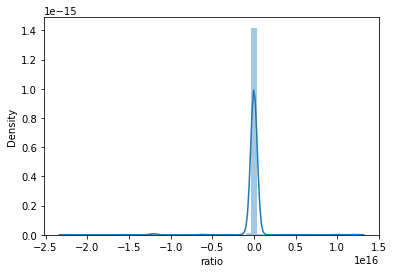

In [167]:
temp_ratio = pd.DataFrame(index = temp_hom.index)

temp_ratio = temp_hom[['chromosome', 'start', 'end']].copy()


temp_ratio['ratio'] = (temp_het['abs_diffs_pc_mut_spls'] / temp_hom['abs_diffs_pc_mut_spls']).replace([np.inf, -np.inf], np.nan).fillna(0)
temp_ratio['gene'] = temp_ratio.index
temp_ratio = temp_ratio[temp_ratio['ratio'] != 0]
temp_ratio = temp_ratio[temp_ratio['ratio'] != 1]

sns.distplot(temp_ratio['ratio'])

<AxesSubplot:xlabel='gene', ylabel='ratio'>

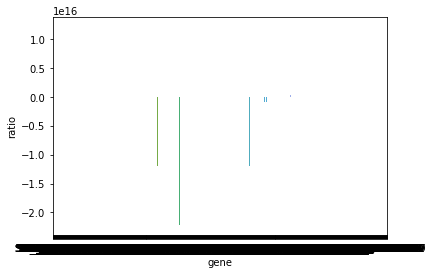

In [180]:
sns.barplot(data = temp_ratio,
            x = 'gene', y = 'ratio')

What effect is 'strongest'? Can that be measured?

Detect HET to HOMO transition?? How?

Calculate heterozyguous to homozyguous ratio? 
    
    Expected 2:1
    
    Admixed populations will be lower
    
    Calculation mostly results in Nan, Inf values as >>0/0, etc...
    
    Homo > Hete == Temperature
    Hete > Homo == Time, Location
    Maybe this means something?
    
    Heterozygous deficiency/excess—heterozygosity is the likelihood that there are different alleles at one genetic locus. In an ideal population, its fraction is determined by HWE. Deviations in the heterozygosity indicate inbreeding (deficiency) or heterozygote superiority or extensive clonality (excess).  https://academic.oup.com/plankt/article/39/2/165/2929413

All factors seem to have % impact in driving Smarinoi response

Venn diagram of all SVs, SNPs/allele frequencies detected?

